In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('all_anonymized_2015_11_2017_03.csv')

In [3]:
data.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [4]:
data.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

### Preprocessing

Checking missing values in each variables. 

In [5]:
data.isnull().mean()

maker                  0.146053
model                  0.318995
mileage                0.102053
manufacture_year       0.104303
engine_displacement    0.209241
engine_power           0.156175
body_type              0.316055
color_slug             0.941034
stk_year               0.480776
transmission           0.208739
door_count             0.172921
seat_count             0.210951
fuel_type              0.520026
date_created           0.000000
date_last_seen         0.000000
price_eur              0.000000
dtype: float64

 ### Statistics Visualize
 
 1. Statistics of numerical data
 2. Categorical Data

In [6]:
data.describe(include = 'float64')

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [7]:
data.describe(include = 'object')

,maker,model,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen
count,3033997,2419551,2429998,209501,1844756,2811282,2938539.0,2803423.0,1705306,3552912,3552912
unique,46,1012,9,14,298,2,26.0,88.0,5,3552912,3355057
top,skoda,octavia,other,black,None,man,5.0,5.0,gasoline,2016-11-09 16:03:20.71388+00,2016-01-27 20:40:15.46361+00
freq,313830,129563,1964289,42931,1308651,2021990,777522.0,1084557.0,902222,1,197856


In [8]:
#Lets watch each category count of the categorical variables
for cols in data:
    if data[cols].dtypes == 'object':
        
        print("\n")
        print("************************")
        print("Unique count for column:{}\n".format(cols))
        
        print(data[cols].value_counts())



************************
Unique count for column:maker

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
peugeot           92130
hyundai           80602
seat              74645
toyota            72908
nissan            68008
kia               48607
volvo             48271
mazda             45666
mini              35678
smart             32918
suzuki            31184
mitsubishi        28463
honda             26225
porsche           24317
chevrolet         20856
rover             20611
jeep              17075
lancia            13759
subaru            10107
jaguar            10056
chrysler           9296
dodge              5223
alfa-romeo         4734
lexus              3911
dacia              2024
maserati           1912
land-rover         1721
isuzu              1427
bentley            1081
hummer

data_created and data_last_seen column contains data and time of data. Let's just keep date. We willn't using time of data. So let's only keep data.

In [9]:
data['date_created'] = data['date_created'].apply(lambda x: x.split()[0])
data['date_last_seen'] = data['date_last_seen'].apply(lambda x: x.split()[0])


In [10]:
data['date_created']

0          2015-11-14
1          2015-11-14
2          2015-11-14
3          2015-11-14
4          2015-11-14
              ...    
3552907    2017-03-16
3552908    2017-03-16
3552909    2017-03-16
3552910    2017-03-16
3552911    2017-03-16
Name: date_created, Length: 3552912, dtype: object

Let's see scatter plot of date_last_seen and euro price

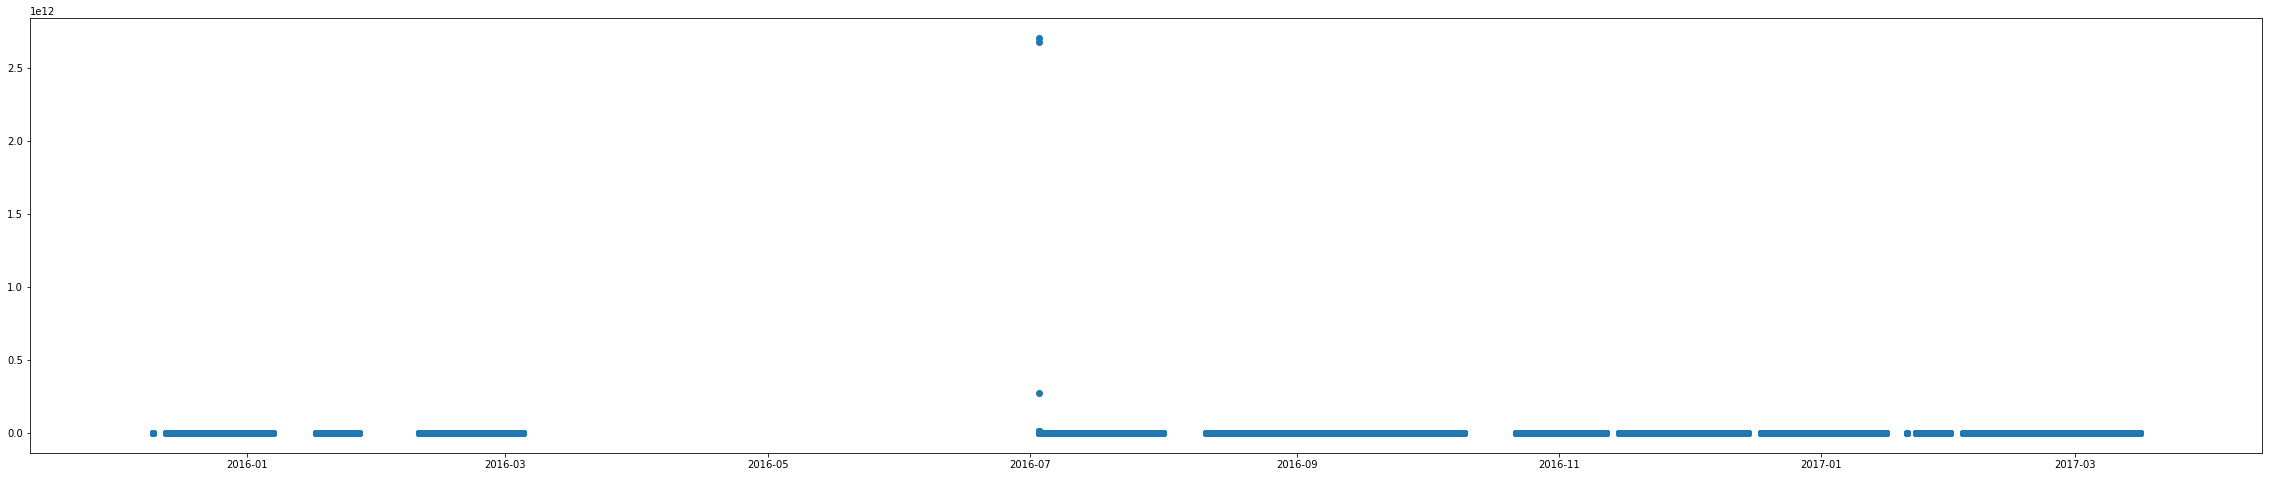

In [11]:
import matplotlib
b = data[['date_last_seen','price_eur']]
b['date_last_seen'] = pd.to_datetime(b['date_last_seen'])
matplotlib.rcParams['figure.figsize']= (40,8)
plt.scatter(b['date_last_seen'], b['price_eur'])

### Working with missing values

Let's drop `color_slug` because it contains more missing values. Also, let's make assumption that it wont hamper to our model

In [12]:
new_data = data.drop(['color_slug'], axis=1)
new_data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,None,man,5,7,diesel,2015-11-14,2016-01-27,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,None,man,5,5,diesel,2015-11-14,2016-01-27,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,None,man,5,5,diesel,2015-11-14,2016-01-27,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14,2016-01-27,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14,2016-01-27,2738.71


Let's check variable `door_count` and `seat_count`

In [13]:

print("Unique values of door_Count:", new_data['door_count'].unique())
print("************************************")
print("Unique values of seat_Count:", new_data['seat_count'].unique())

Unique values of door_Count: ['5' '3' '4' 'None' '2' '6' '1' '7' nan 5.0 4.0 3.0 2.0 6.0 1.0 9.0 7.0
 8.0 77.0 58.0 54.0 0.0 55.0 22.0 45.0 17.0 49.0]
************************************
Unique values of seat_Count: ['7' '5' '4' 'None' '6' '9' '8' '2' '3' '1' '18' '20' '10' '11' '15' '12'
 '16' '14' '50' '17' '74' '65' '19' '54' '13' '27' '45' '24' '56' '22'
 '255' '23' '57' '25' nan 5.0 3.0 4.0 2.0 7.0 8.0 6.0 9.0 23.0 1.0 51.0
 12.0 15.0 14.0 55.0 19.0 61.0 21.0 13.0 17.0 20.0 10.0 11.0 18.0 45.0
 27.0 53.0 26.0 56.0 58.0 25.0 30.0 36.0 54.0 24.0 16.0 57.0 74.0 50.0 0.0
 29.0 52.0 32.0 44.0 512.0 33.0 515.0 59.0 85.0 517.0 81.0 43.0 49.0 138.0]


We got 'None' as one unique value in both variables. That may the mistake during entry. So, we will do 

1. Change 'None' value to nan
2. Then convert dtype from object to float i.e numeric.

In [14]:
new_data['door_count'] = new_data['door_count'].replace('None', np.nan).astype(float)
new_data['seat_count'] = new_data['seat_count'].replace('None', np.nan).astype(float)

Impute `door_count` and `seat_count` with mode 

In [15]:
new_data['door_count'].fillna(new_data['door_count'].mode()[0], inplace=True)
new_data['seat_count'].fillna(new_data['seat_count'].mode()[0], inplace=True)


For transmission

categorical dataset
 The map method can be used to replace values in a column by passing 
 a dictionary of the form {old_value: new_value} as its argument:

In [16]:
d = {'man': 1, 'auto': 0} 

#convert categirical to numerical
new_data= new_data.replace({'transmission': d})

new_data['transmission'].fillna(new_data['transmission'].mode()[0], inplace=True)



In [17]:
new_data.isnull().mean()

maker                  0.146053
model                  0.318995
mileage                0.102053
manufacture_year       0.104303
engine_displacement    0.209241
engine_power           0.156175
body_type              0.316055
stk_year               0.480776
transmission           0.000000
door_count             0.000000
seat_count             0.000000
fuel_type              0.520026
date_created           0.000000
date_last_seen         0.000000
price_eur              0.000000
dtype: float64

In [18]:
medium_value = new_data.pivot_table(values = 'engine_power', 
                               index = [ 'maker', 'model'], aggfunc = np.median)
medium_value

engine_power
maker      model              
alfa-romeo 145            77.0
           146            77.0
           147            85.0
           155           103.0
           156           103.0
...                        ...
volvo      v70           120.0
           v90           173.0
           xc60          133.0
           xc70          136.0
           xc90          140.0

[1092 rows x 1 columns]

In [19]:
new_data['engine_power']= new_data['engine_power'].fillna(new_data.groupby(['maker','model'])['engine_power'].transform('median'))
#Null value on remaining tuples
new_data.apply(lambda x: sum(x.isnull()))

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            229285
body_type              1122914
stk_year               1708156
transmission                 0
door_count                   0
seat_count                   0
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [20]:
new_data['engine_power']= new_data['engine_power'].fillna(new_data.groupby(['model'])['engine_power'].transform('median'))
#Null value on remaining tuples
new_data.apply(lambda x: sum(x.isnull()))

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            229214
body_type              1122914
stk_year               1708156
transmission                 0
door_count                   0
seat_count                   0
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

Remaining no. of tuples are: 3323698


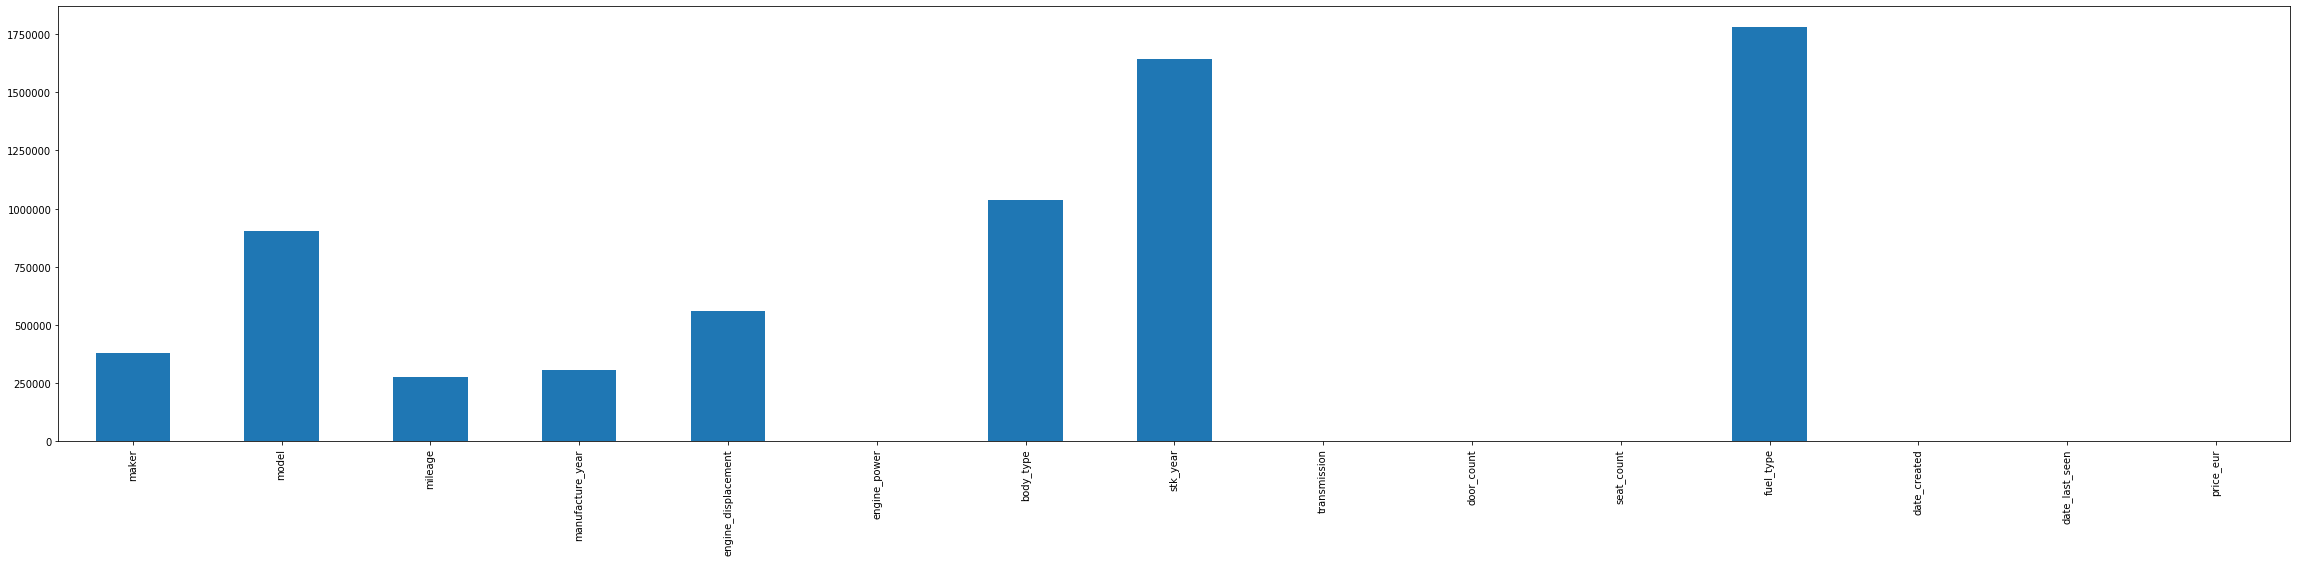

In [21]:
missing = new_data.loc[new_data['engine_power'].isnull()].index
new_data.drop(missing, inplace = True)
print("Remaining no. of tuples are:",len(new_data))
new_data.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

Now, engine field doesnot have null values.

Let's do the same with mileage field.

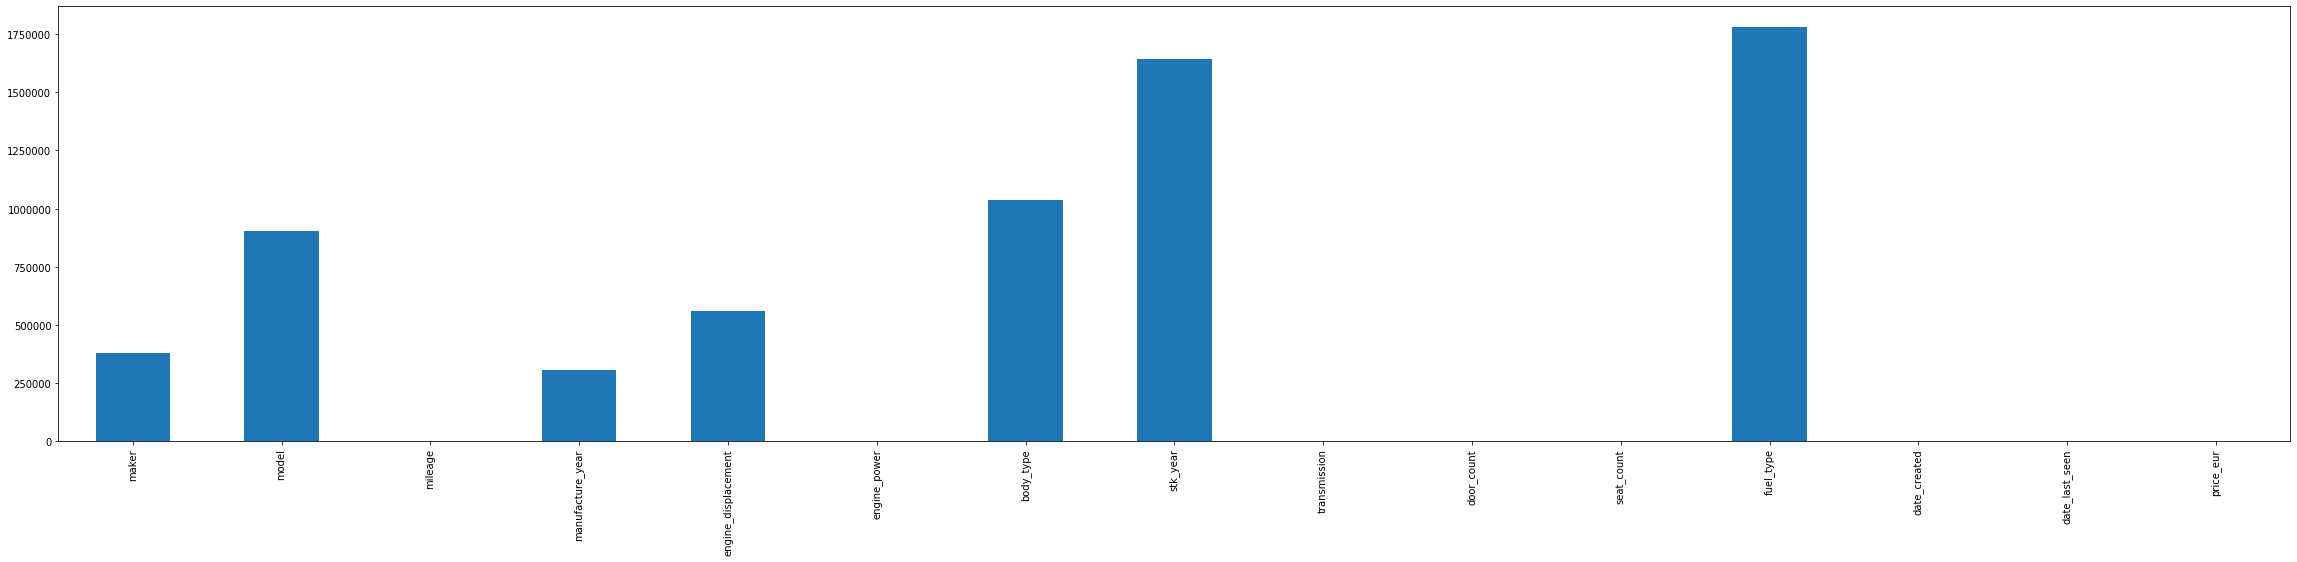

In [22]:
new_data['mileage']= new_data['mileage'].fillna(new_data.groupby(['maker','model'])['mileage'].transform('median'))
new_data['mileage']= new_data['mileage'].fillna(new_data.groupby(['model'])['mileage'].transform('median'))
new_data['mileage']= new_data['mileage'].fillna(new_data.groupby(['manufacture_year'])['mileage'].transform('median'))
new_data['mileage'] = new_data['mileage'].fillna(new_data['mileage'].median())
new_data.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

In [23]:
new_data.isnull().mean()

maker                  0.114484
model                  0.272044
mileage                0.000000
manufacture_year       0.092430
engine_displacement    0.168208
engine_power           0.000000
body_type              0.312001
stk_year               0.494006
transmission           0.000000
door_count             0.000000
seat_count             0.000000
fuel_type              0.535858
date_created           0.000000
date_last_seen         0.000000
price_eur              0.000000
dtype: float64

Null values in 'maker' column is filled with mode or highest frequency value.

In [24]:
new_data['maker'].fillna(new_data['maker'].mode()[0], inplace=True)

Impute:

1. `manufacture_year` using mean and groupby with `maker` and `manufacture_year` 
2. `engine_displacement` using mode.

In [25]:
new_data["manufacture_year"] = new_data.groupby("maker")['manufacture_year'].transform(lambda x: x.fillna(x.mean()))

In [26]:
new_data['engine_displacement'].fillna(new_data['engine_displacement'].mode()[0], inplace=True)

In [27]:
new_data.drop(['body_type', 'stk_year' ], axis=1, inplace=True)

### Correlation

Let's see correlation plot between numerical variables

In [28]:
correlation = new_data.corr()
# sns.heatmap(data = correlation, annot = True)

Let's see how other features are correlated with our desired output feature: `price_eur`.


In [29]:
correlation['price_eur'].sort_values(ascending = False)

price_eur              1.000000
transmission           0.000296
seat_count             0.000048
engine_displacement    0.000007
mileage               -0.000009
manufacture_year      -0.000020
door_count            -0.000030
engine_power          -0.000430
Name: price_eur, dtype: float64

#### Outlier

Let's see the outlier in numerical variables.

In [31]:
numerical_clos = ['mileage', 'manufacture_year', 'engine_displacement',
                    'engine_power', 'transmission', 'door_count',
                    'seat_count', 'price_eur']
# data_out.head(2)

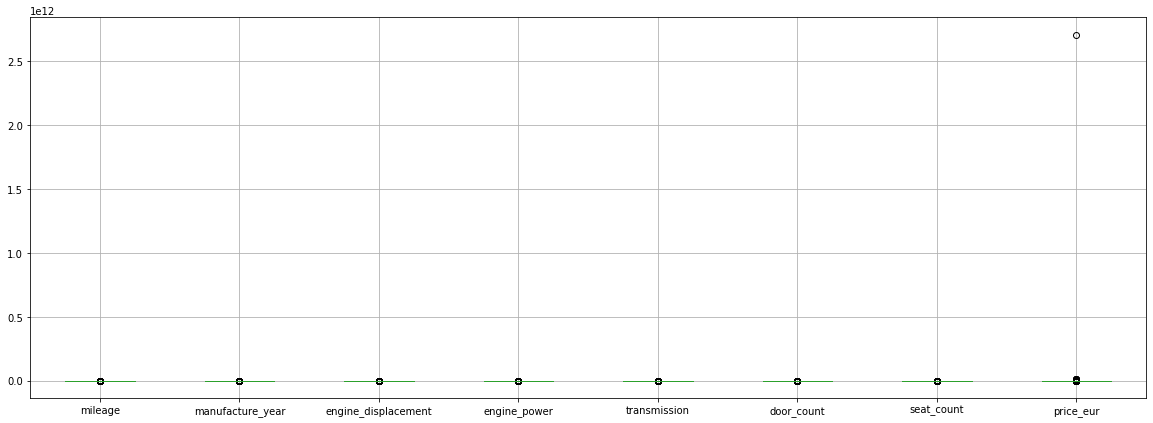

In [32]:
plt.figure(figsize=(20,7))
new_data.boxplot(numerical_clos)

Outlier in `price_eur` and `engine_power` using boxplot

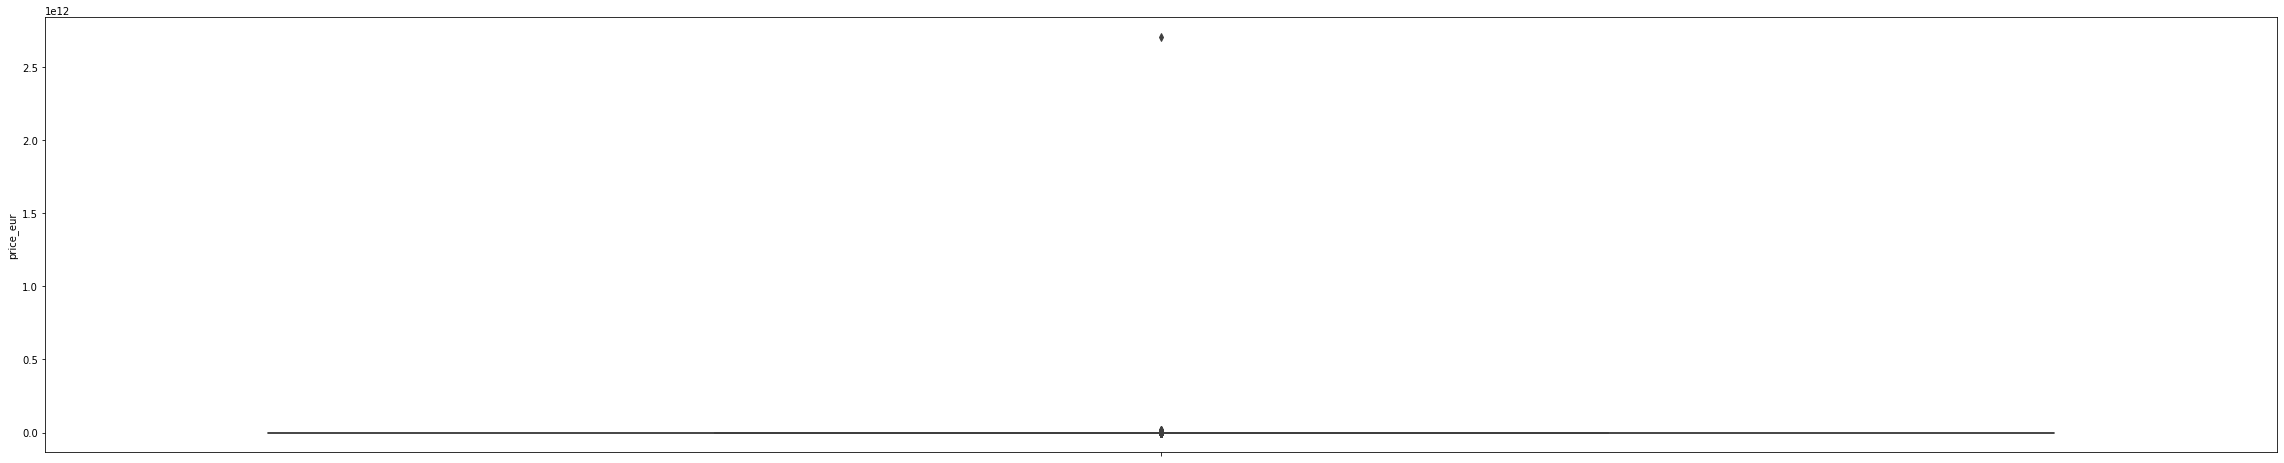

In [33]:
sns.boxplot(y=new_data['price_eur'])

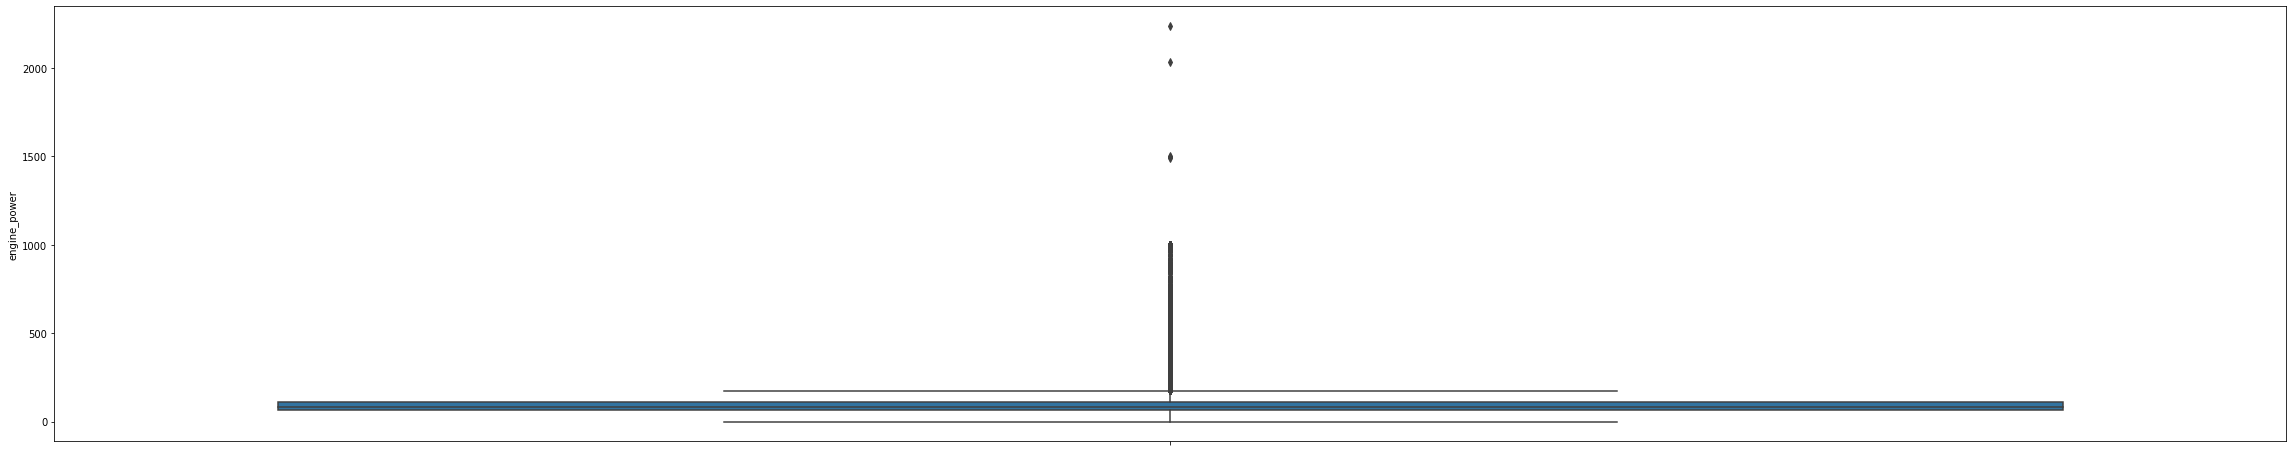

In [34]:
sns.boxplot(y=new_data['engine_power'])